In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression



# **Bootstrap en régression linéaire**:




Dans ce note book, nous allons illustrer l'utilisation du Bootstrap en régression linéaire par trois différentes méthodes.


## Partie 1:


Dans cette partie nous allons implementer le bootstrap des résidus. Pour cela on utilise un jeu de données issu d'une étude reliant le QI de l'enfant à leurs mères aux US.

In [ ]:
# Importation de la table
kidiq = pd.read_csv("kidiq.csv")
kidiq.head()


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


kid_score : le QI de l'enfant \
mom_iq	: le QI de la mère. \
On s'intéresse à un modèle ou l'on cherche à prédire le QI de l'enfant à partir de celui de la mère.

In [ ]:
#table avec les variables d'intérêts
table=kidiq[["kid_score", "mom_iq"]]
table.head()
#kidiq.head()
#table.isnull().sum()

,kid_score,mom_iq
0,65,121.117529
1,98,89.361882
2,85,115.443165
3,83,99.449639
4,115,92.745710


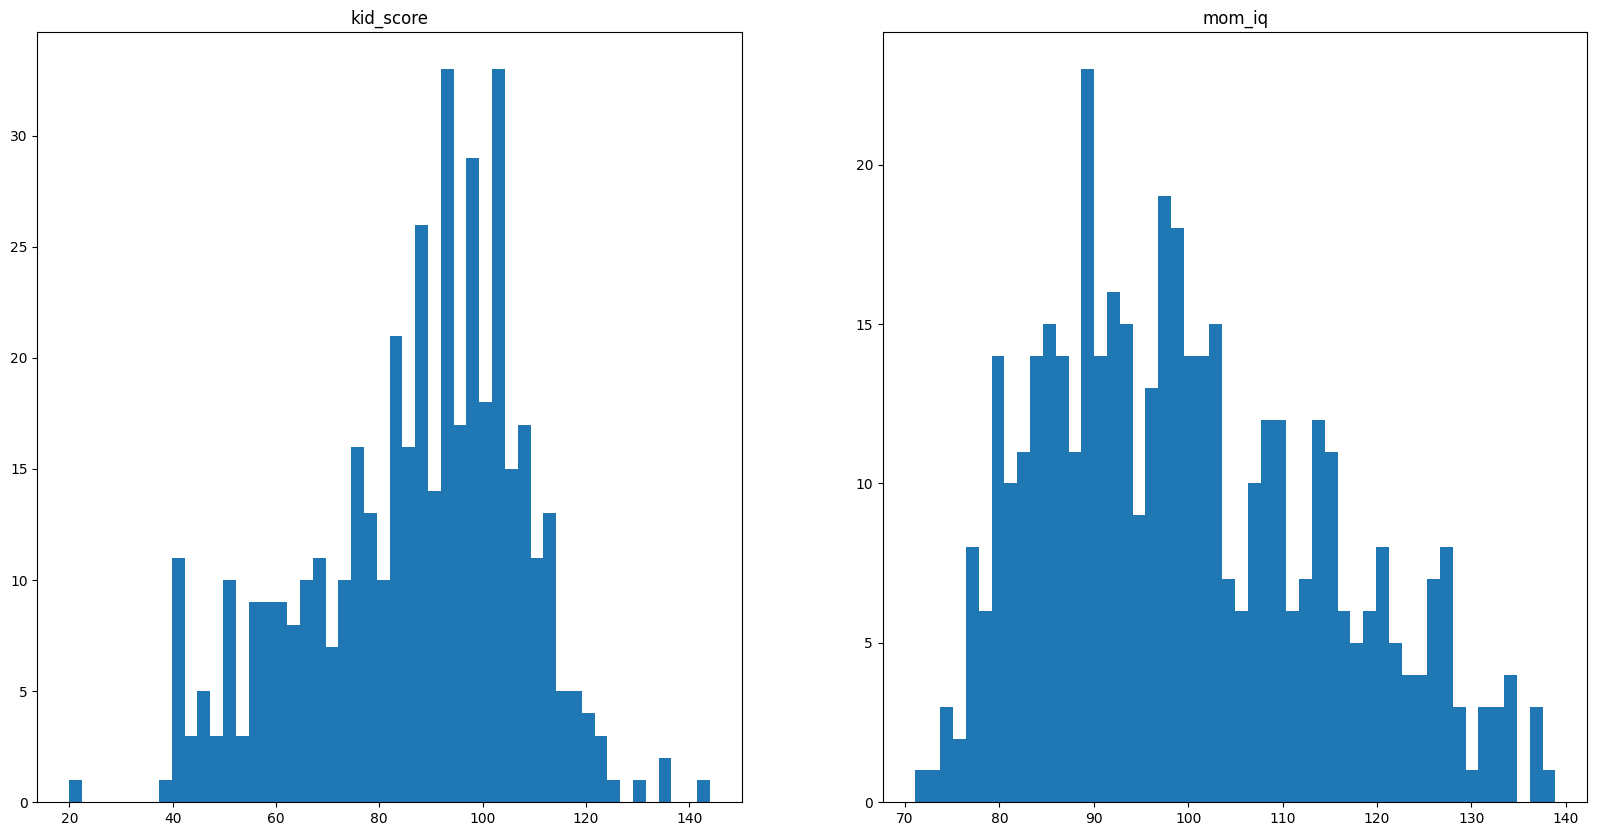

In [ ]:
# Visualisation de la distribution des variables
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
axs = axs.ravel()

for i, column in enumerate(table.columns):
    axs[i].hist(table[column], bins=50)
    axs[i].set_title(column)

plt.show()

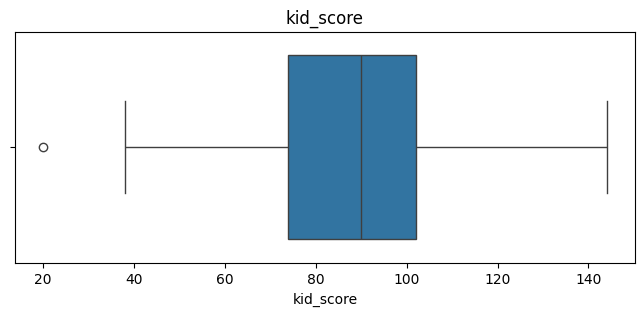

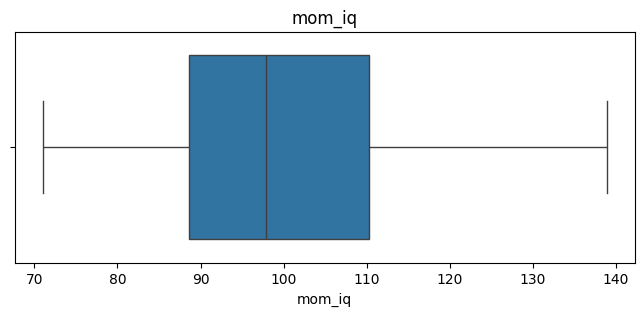

In [ ]:
# Tracé des boxplots pour chaque variable
for column in table.columns:
    fig, ax = plt.subplots(figsize=(8, 3))
    sns.boxplot(x=table[column], ax=ax)
    plt.title(column)
    plt.show()

D'abord on fait une régression linéaire simple avec les données originales de notre table.

(array([ 1.,  0.,  1.,  0.,  0.,  2.,  2.,  2.,  3.,  3.,  6.,  6.,  8.,
         6.,  7.,  5.,  7.,  7., 15., 13.,  9., 16.,  7., 12., 16., 18.,
        15., 24., 21., 25., 24., 24., 25., 18., 14., 11.,  8.,  9.,  9.,
        13.,  2.,  4.,  6.,  1.,  3.,  2.,  1.,  1.,  1.,  1.]),
 array([-56.75285625, -54.66397346, -52.57509067, -50.48620789,
        -48.3973251 , -46.30844231, -44.21955952, -42.13067674,
        -40.04179395, -37.95291116, -35.86402837, -33.77514559,
        -31.6862628 , -29.59738001, -27.50849722, -25.41961444,
        -23.33073165, -21.24184886, -19.15296607, -17.06408329,
        -14.9752005 , -12.88631771, -10.79743492,  -8.70855213,
         -6.61966935,  -4.53078656,  -2.44190377,  -0.35302098,
          1.7358618 ,   3.82474459,   5.91362738,   8.00251017,
         10.09139295,  12.18027574,  14.26915853,  16.35804132,
         18.4469241 ,  20.53580689,  22.62468968,  24.71357247,
         26.80245525,  28.89133804,  30.98022083,  33.06910362,
         35.

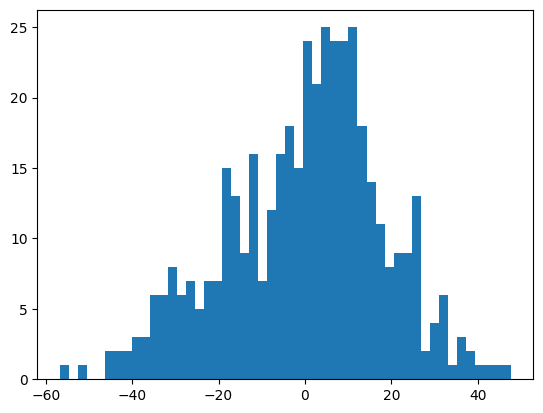

In [ ]:
#régression linéaire simple
import statsmodels.api as sm
X=table["mom_iq"]
Y=table["kid_score"]
#fit du modèle
lr_model = sm.OLS(Y, sm.add_constant(X)).fit()
#afficher la sortie
results_table = lr_model.summary2().tables[1]
results_table
Y_predi=lr_model.predict(sm.add_constant(X))
residus=lr_model.resid
#centrons les données des résidus avant de créer l'échantillon bootstrap des résidus
#residus=residus-np.mean(residus)
residus
plt.hist(residus, bins=50)

Les Résidus suivent une distribution gaussienne ou normale. Par conséquent l'hypothèse gaussienne est valide. Par la suite les intervalles de confiances obtenus par régression linéaire seront utilisables.

On peut rendre la normalité de la distribution beaucoup plus parfaite à l'aide de la formule suivante:
On note $r_j$ le résidus normalisé de $e_j$
$$r_j=\frac{1}{(1-h_j)^{\frac{1}{2}}}e_j$$

avec $$h_{j}=\frac{1}{n}+\frac{(x_j-\bar{x})^2}{∑_j^{n}(x_j-\bar{x})^2}$$
Et on obtiendra des résidus studentisés.

In [ ]:
#normalisation des résidus en appliquant la formule
n = len(residus)
h=(1/n + (X-np.mean(X))**2/sum((X-np.mean(X))**2))
residus=1/(np.sqrt(1-h))*(Y-Y_predi)
residus=residus-np.mean(residus)

In [ ]:
residus[1]
#(X-np.mean(X))/np.var(X)
#(X-np.mean(X))**2
#residus=1/(np.sqrt(1-h))*(Y-Y_predi)

17.726231878324754

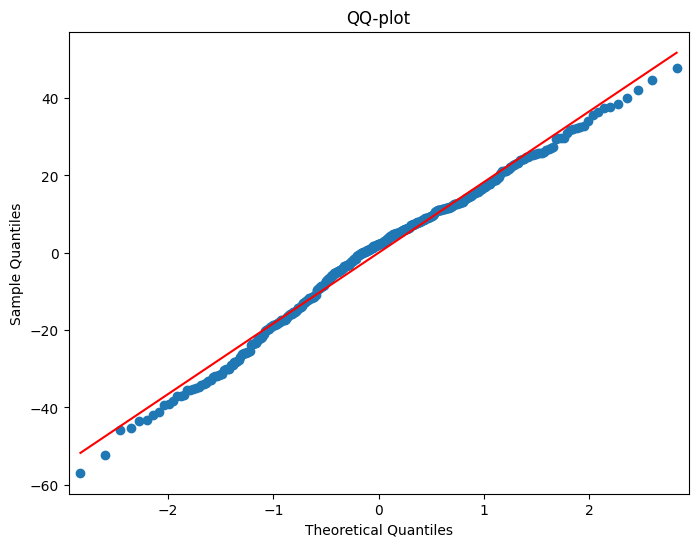

In [ ]:
#plt.hist(residus)
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residus, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()

L'hypothèse de normalité des résidus est valide

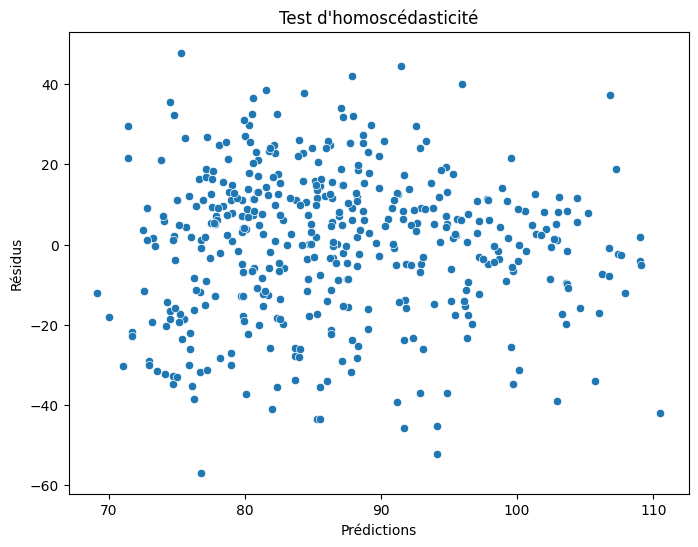

In [ ]:
#test d'homocédasticité
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_predi, y=residus)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

L'hypothése d'homocédasticité est valide d'aprés la figure ci-dessus. \
Donc tous les hypothèses du Bootstrap des résidus sont valides.

Maintenant nous allons créer des echantillons Bootstrap des résidus ensuite créer des échantillons Bootstrap pour la variable à expliquer en utilisant la formule suivante:\
Soit $e_k^*$, un échantillon aléatoire et simple prélevé avec remise dans le vecteur $e$ des résidus.
$$ Y_k^*= X \hat \beta + e_k^*$$
Maintenant $Y_k^*$ est un échantillon bootstrap des prédictions.

In [ ]:
# échantillon Bootstrap des prédictions

R=1000
bootstrap_samples = [residus.sample(n=len(residus), replace=True) for _ in range(R)]
bootstrap_samples
bootstrap_predictions=[]

for bootstrap_residual in bootstrap_samples:
    bootstrap_predictions.append(np.array(Y_predi) + bootstrap_residual)
bootstrap_predictions[0]

#les estimations du paramétre beta_1 bootstrap
beta_1=[] #vecteur d'estimations bootstrap
for Ypredi in bootstrap_predictions:
    resultats= sm.OLS(np.array(Ypredi), sm.add_constant(X)).fit()
    beta_1.append(resultats.params[1])
#beta_1[1]


In [ ]:
#la moyenne et l'écart-type
print(f" mean = {np.mean(beta_1)}")
print(f" std = {np.std(beta_1)}")
#np.std(beta_1)

 mean = 0.6134370538200755
 std = 0.0601217266586447


(array([ 3.,  4.,  1.,  1.,  2.,  4., 10.,  8., 10., 14., 17., 18., 23.,
        21., 35., 30., 39., 46., 52., 46., 48., 44., 44., 50., 39., 51.,
        45., 39., 35., 36., 27., 29., 26., 13., 17., 14., 16., 12.,  9.,
        13.,  3.,  0.,  3.,  0.,  1.,  0.,  1.,  0.,  0.,  1.]),
 array([0.44422383, 0.45168855, 0.45915327, 0.46661798, 0.4740827 ,
        0.48154742, 0.48901213, 0.49647685, 0.50394156, 0.51140628,
        0.518871  , 0.52633571, 0.53380043, 0.54126514, 0.54872986,
        0.55619458, 0.56365929, 0.57112401, 0.57858873, 0.58605344,
        0.59351816, 0.60098287, 0.60844759, 0.61591231, 0.62337702,
        0.63084174, 0.63830645, 0.64577117, 0.65323589, 0.6607006 ,
        0.66816532, 0.67563004, 0.68309475, 0.69055947, 0.69802418,
        0.7054889 , 0.71295362, 0.72041833, 0.72788305, 0.73534776,
        0.74281248, 0.7502772 , 0.75774191, 0.76520663, 0.77267135,
        0.78013606, 0.78760078, 0.79506549, 0.80253021, 0.80999493,
        0.81745964]),
 <BarContainer

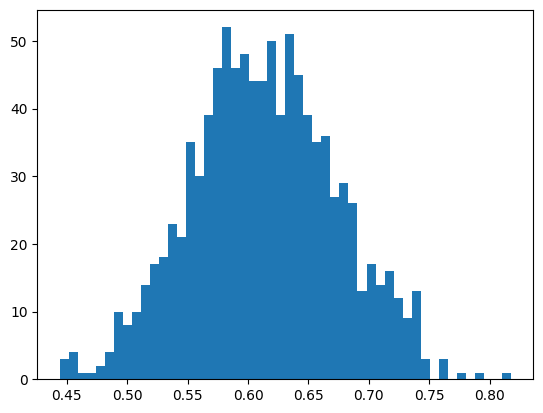

In [ ]:
#l'histogramme des estimations de beta_1
plt.hist(beta_1, bins=50)

**Commentaire:** l'echantillon bootstrap du paramétre $β_1$ suit asymptotiquement une distribution normale.

**INTERVALLES DE CONFIANCES BOOTSTRAP**

In [ ]:
# intervallle de confiance bootstrap
inf=np.percentile(beta_1, 2.5)
sup=np.percentile(beta_1, 97.5)
print(f" borne inf = {inf}")
print(f" borne sup = {sup}")


 borne inf = 0.49541769662919327
 borne sup = 0.7187861870322095


In [ ]:
#intervalle de confiance de la régression avec les données originales
confidence_intervals = lr_model.conf_int()
confidence_intervals
#kidiq.iloc[0]["mom_iq"]

,0,1
const,14.169279,37.430277
mom_iq,0.494953,0.724996


Comparés par la régression linéaire avec  les données originales, les intervalles de confiances Bootstrap pour le paraméttre $β_1$ sont trés similaires aux intervalles de confiances avec l'hypothèse gaussienne.

In [ ]:
# des intervales de confiances à partir du Bootstrap
IC_beta1=[]
for bootstrap_res in bootstrap_predictions:
    lr_model = sm.OLS(np.array(bootstrap_res), sm.add_constant(X)).fit()

    #confidence_intervals = lr_model.conf_int()
    IC_beta1.append(confidence_intervals.iloc[1]) #pour chaque beta_1 bootstrap récupére son intervalle de
    # confiance que l' on rajoute à notre liste
#kidiq.iloc[0]["mom_iq"]
IC_beta1[0] #intervalle de confiance du premier estimation de beta_1 par bootstrap

0    0.494953
1    0.724996
Name: mom_iq, dtype: float64

In [ ]:
#vérifions si l'intervalle de confiance contient la valeur estimé
print(beta_1[0])
print(IC_beta1[0])

-0.05130931772351603
0   -0.179689
1    0.077070
Name: mom_iq, dtype: float64


**sortie:** 0 correspond à la borne inférieure et 1 la borne supérieure.

On va essayer de pédire  le résultat des éléctions (vote) par la croissance économique (growth)

**UTILISATION DU JEU DE DONNEES MAMMALS**

In [ ]:
# Importation de la table
table= pd.read_csv("mammals.csv")
table.head()

,Mammal,body,brain
0,Arctic fox,3.385,44.5
1,Owl monkey,0.480,15.5
2,Mountain beaver,1.350,8.1
3,Cow,465.000,423.0
4,Grey wolf,36.330,119.5


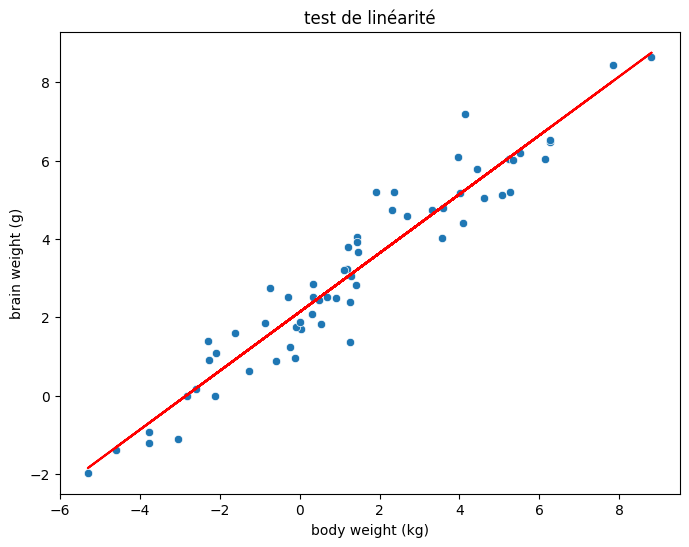

In [ ]:
#vérification de la linéarité
plt.figure(figsize=(8, 6))
y_log=np.log(table['brain'])
x_log=np.log(table['body'])
sns.scatterplot(x=x_log, y=y_log)
plt.title('test de linéarité')
plt.xlabel('body weight (kg)')
plt.ylabel('brain weight (g)')
slope, intercept = np.polyfit(x_log, y_log, 1)
plt.plot(x_log, slope*x_log + intercept, color='red')
plt.show()

In [ ]:

#régression linéaire simple
import statsmodels.api as sm
X=np.log(table["body"])
Y=np.log(table["brain"])
#fit du modèle
resultats = sm.OLS(Y, sm.add_constant(X)).fit()
results_table = resultats.summary2().tables[1]
results_table

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
const,2.134789,0.096043,22.227336,1.183207e-30,1.942673,2.326904
body,0.751686,0.028464,26.408711,9.835792e-35,0.694750,0.808622


(array([ 1.,  1., 10., 11., 16.,  9.,  7.,  4.,  1.,  2.]),
 array([-1.71549643, -1.34911784, -0.98273925, -0.61636066, -0.24998207,
         0.11639652,  0.48277511,  0.8491537 ,  1.21553229,  1.58191088,
         1.94828946]),
 <BarContainer object of 10 artists>)

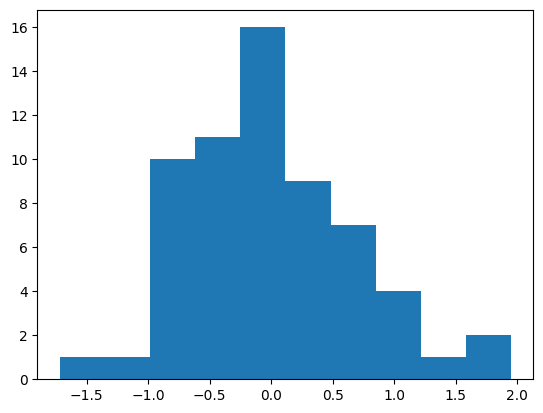

In [ ]:
residus=resultats.resid
plt.hist(residus)

(array([ 1.,  1., 10., 12., 15., 10.,  6.,  4.,  1.,  2.]),
 array([-1.72861557, -1.35792633, -0.98723708, -0.61654784, -0.24585859,
         0.12483066,  0.4955199 ,  0.86620915,  1.2368984 ,  1.60758764,
         1.97827689]),
 <BarContainer object of 10 artists>)

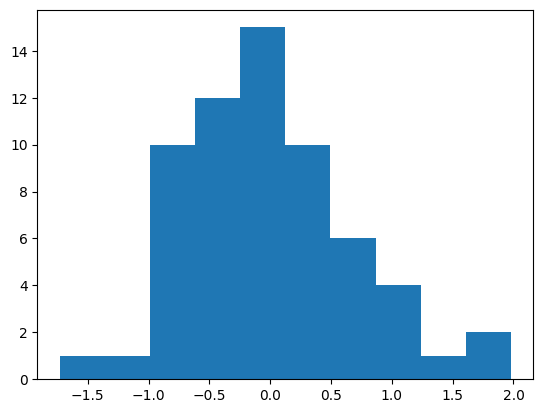

In [ ]:
#résidus normalisé
n=len(residus)
h=(1/n + (X-np.mean(X))**2/sum((X-np.mean(X))**2))
residus=1/(np.sqrt(1-h))*(residus)
residus=residus-np.mean(residus)
plt.hist(residus)

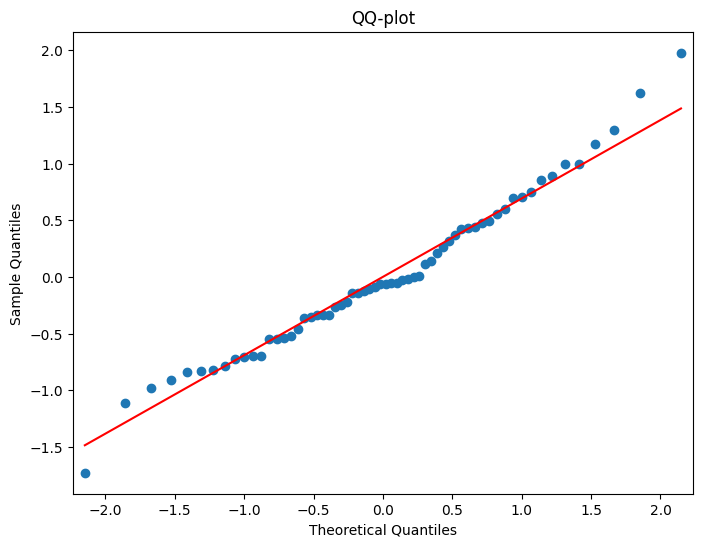

In [ ]:
#on peut le vérifier avec le QQ-plot
fig, ax = plt.subplots(figsize=(8, 6))
sm.qqplot(residus, line='s', ax=ax)
ax.set_title('QQ-plot')
plt.show()

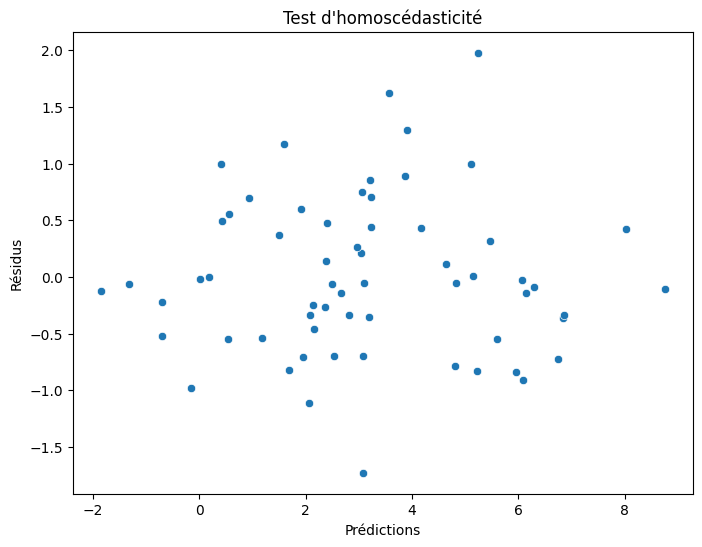

In [ ]:
#test d'homocédasticité
y_predi=resultats.predict()
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_predi, y=residus)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

In [ ]:
# échantillon Bootstrap des prédictions

R=10
bootstrap_samples = [residus.sample(n=len(residus), replace=True) for _ in range(R)]
bootstrap_samples
bootstrap_predictions=[]

for bootstrap_residual in bootstrap_samples:
    bootstrap_predictions.append(np.array(y_predi) + bootstrap_residual)
bootstrap_predictions[0]

#les estimations du paramétre beta_1 bootstrap
beta_1=[] #vecteur d'estimations bootstrap
for Ypredi in bootstrap_predictions:
    resultats= sm.OLS(np.array(Ypredi), sm.add_constant(X)).fit()
    beta_1.append(resultats.params[1])
#beta_1[1]


In [ ]:
#la moyenne et l'écart-type
print(f" mean = {np.mean(beta_1)}")
print(f" std = {np.std(beta_1)}")
#np.std(beta_1)

In [ ]:
# intervallle de confiance bootstrap
inf=np.percentile(beta_1, 2.5)
sup=np.percentile(beta_1, 97.5)
print(f" borne inf = {inf}")
print(f" borne sup = {sup}")

**CAS DE l'HETEROASCEDASTCITE SUR UN JEU DE DONNEES SIMULES AVEC LA MACHINE**

In [ ]:
np.random.seed(4)
n=100
x = np.random.normal(loc=0, scale=1, size=n)

# Définir la relation de variance des résidus en fonction de la covariable
variance_relation = 2 * x**2 + 0.5
# Générer des résidus en utilisant la relation de variance
residuals = np.random.normal(loc=0, scale=np.sqrt(variance_relation), size=n)

# Relation linéaire avec la covariable
#beta_0 = 2
#beta_1 = 1.5
y = x + residuals

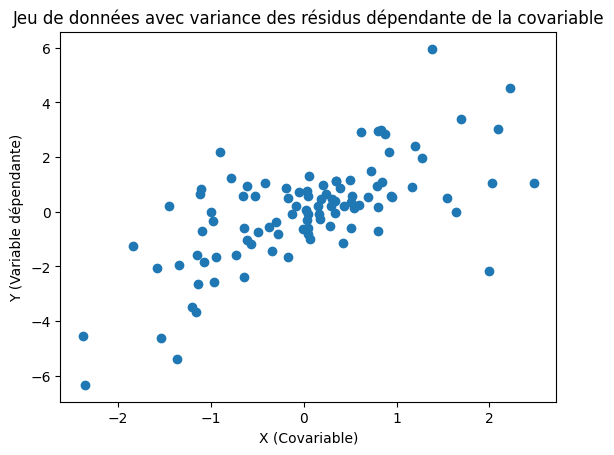

In [ ]:
plt.scatter(x, y)
plt.xlabel('X (Covariable)')
plt.ylabel('Y (Variable dépendante)')
plt.title('Jeu de données avec variance des résidus dépendante de la covariable')
plt.show()

(array([ 1.,  2.,  4., 10., 25., 28., 17., 11.,  0.,  2.]),
 array([-4.73455064, -3.84075233, -2.94695402, -2.05315571, -1.15935741,
        -0.2655591 ,  0.62823921,  1.52203752,  2.41583582,  3.30963413,
         4.20343244]),
 <BarContainer object of 10 artists>)

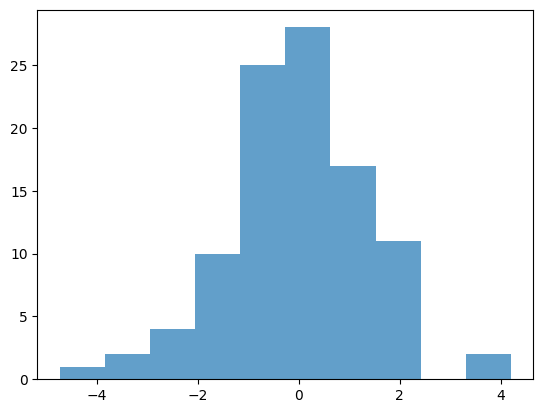

In [ ]:
#régression linéaire simple
import statsmodels.api as sm
resultats = sm.OLS(y, sm.add_constant(x)).fit()
resultats_table=resultats.summary2().tables[1]
resultats_table[['Coef.']].iloc[1]
resultats_table[['Coef.']]
resultats_table
plt.hist(resultats.resid,alpha=0.7)

In [ ]:
# échantillon Bootstrap des prédictions
residus=resultats.resid
Y_predi=resultats.predict()
R=1000
bootstrap_samples = [np.random.choice(residus,size=len(residus), replace=True) for _ in range(R)]
bootstrap_samples
bootstrap_predictions=[]
for bootstrap_residual in bootstrap_samples:
    bootstrap_predictions.append(Y_predi+ bootstrap_residual)

x=np.array(x)
#les estimations du paramétre beta_1 bootstrap
beta_1=[] #vecteur d'estimations bootstrap
for boot in bootstrap_predictions:
    resultats= sm.OLS(np.array(boot), sm.add_constant(x)).fit()
    beta_1.append(resultats.params[1])


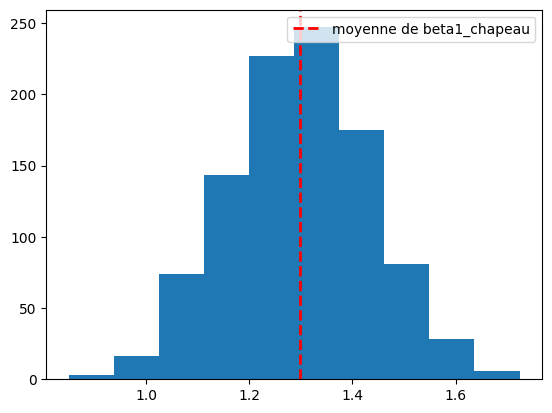

In [ ]:
plt.hist(beta_1)
plt.axvline(x=np.mean(beta_1), color='red', linestyle='--', linewidth=2, label='moyenne de beta1_chapeau')
plt.legend()
plt.show()

In [ ]:
# intervallle de confiance bootstrap
inf=np.percentile(beta_1, 2.5)
sup=np.percentile(beta_1, 97.5)
print(f" borne inf = {inf}")
print(f" borne sup = {sup}")

 borne inf = 1.0378475894933155
 borne sup = 1.570037220534494


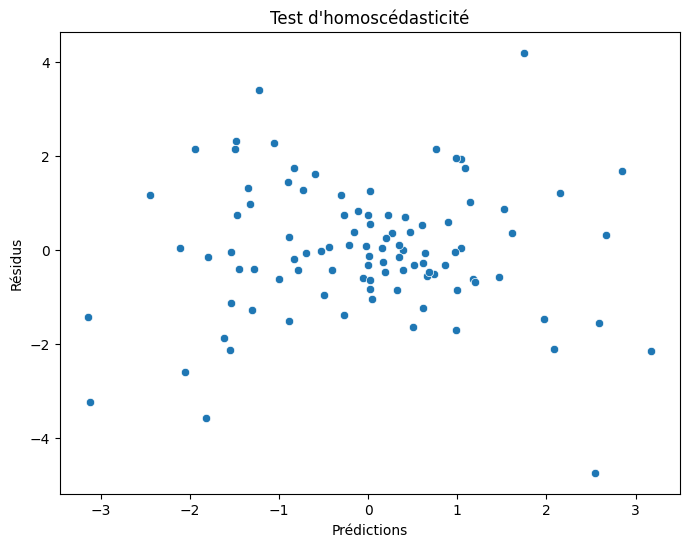

In [ ]:
#test d'homoscédasticité
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_predi, y=residus)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

L'homoscédasticité n'est pas vérifié donc une des hypothéses de la méthode du bootstrap et de la régression linéaire est violée, ce qui fait que les estimations otenues par ces méthodes ne sont pas robustes. Nous allons modifiés par la suite les résidus afin de contourner ce problème.

On va rendre notre modèle homoscédastie. Pour cela nous allons modifier les résidus de tels sorte que leur variance soit indépendante de la variable indépendante $x$.\
Soit $e_j$ tel que $e_j=Y-\hat Y$. Posons
$$h_{j}=\frac{1}{n}+\frac{(x_j-\bar{x})^2}{∑_j^{n}(x_j-\bar{x})^2}$$
alors $$r_j=\frac{1}{v(x_j)(1-h_j)^{\frac{1}{2}}}e_j$$
avec $v$ une fonction  de la variance des residus qui dépend de $x$.\
\
On verra que les résidus modifiés sont approximativement homoscédastiques.

In [ ]:
#résidus modifiées
#definition de la fonction de la variance
def v(x):
    return 0.1 * x**2 + 0.5
n=len(residus)
h=(1/n + (x-np.mean(x))**2/sum((x-np.mean(x))**2))
residus_modif=1/(np.sqrt(v(x)*(1-h)))*residus
residus_modif=residus_modif-np.mean(residus_modif)
residus_modif

array([ 0.75611057,  0.72429123,  1.68554012, -0.46444023,  2.24418345,
        0.01220138,  0.34574012, -0.72899643, -0.01278645, -0.07461644,
        2.91038668,  0.50435748, -2.33139209, -0.62795906, -2.74020636,
        0.95026442,  2.38405179, -1.76022133,  0.76680702, -0.19961202,
        1.24897068,  1.75978137, -0.40428742, -2.39038497,  1.71294167,
        0.51575138,  1.36462828,  2.72683202, -2.47225196, -4.41768722,
        1.95293428, -0.78629566, -1.20713355, -3.28663313,  2.9394547 ,
        0.022839  ,  0.3212814 ,  1.31805556, -0.62192404, -2.30494329,
       -1.45296321, -1.73121312, -0.20285684, -0.85928393,  0.12841914,
       -1.1598448 ,  0.06778056,  1.07465529,  1.62446045,  2.55467254,
       -0.08775116,  1.28202477, -0.49615499,  1.0303759 ,  3.04677611,
       -0.67671187,  2.5582021 , -0.68359306, -0.42310387,  0.1178306 ,
       -2.13710377,  0.9694366 , -1.51306228, -0.8520903 , -0.23344621,
       -1.69320184,  0.41273003, -2.10098657,  0.02217727, -5.16

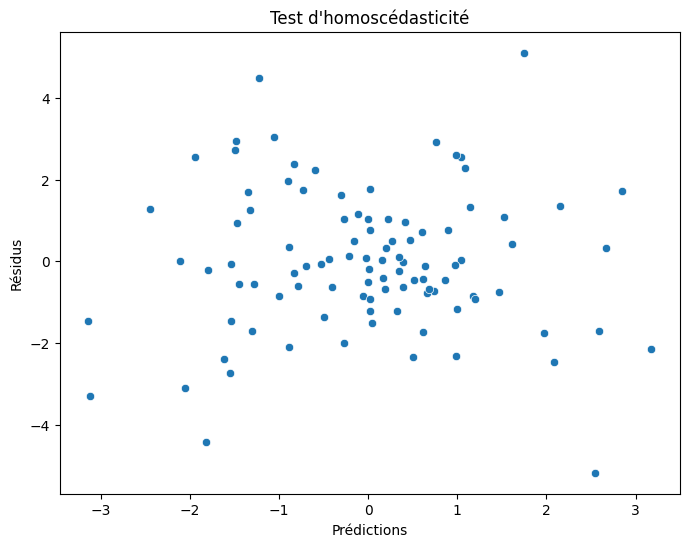

In [ ]:
#test d'homoscédasticité des résidus modifiés
plt.figure(figsize=(8, 6))
sns.scatterplot(x=Y_predi, y=residus_modif)
plt.title('Test d\'homoscédasticité')
plt.xlabel('Prédictions')
plt.ylabel('Résidus')
plt.show()

Maintenant l'hypothése d'homoscédasticité est valide aprés modification des résidus.\
Reprenons le bootstrap avec cette nouvelle échantion de résidus puis comparons les résultats avec ceux obtenus avant.

In [ ]:
#échantillons bootstrap des résidus modifiés
residus=resultats.resid
Y_predi=resultats.predict()
R=1000
bootstrap_residus = [np.random.choice(residus_modif,size=len(residus_modif), replace=True) for _ in range(R)]
#bootstrap des prédictions
bootstrap_predis=[]
for bootstrap_residual in bootstrap_residus:
    bootstrap_predis.append(Y_predi+ bootstrap_residual)

#les estimations du paramétre beta_1 bootstrap
beta1=[] #vecteur d'estimations bootstrap
for boot in bootstrap_predis:
    resultats= sm.OLS(np.array(boot), sm.add_constant(x)).fit()
    beta1.append(resultats.params[1])

In [ ]:
# intervallle de confiance bootstrap avec résidus modifiés
inf=np.percentile(beta1, 2.5)
sup=np.percentile(beta1, 97.5)
print(f" borne inf = {inf}")
print(f" borne sup = {sup}")

 borne inf = 0.9926501397770139
 borne sup = 1.7102332644204326


En comparant les intervalles de confiances ont voit que y'a une différence entre les intervalles de confiances bootstrap et théoriques. Donc pour être précis sur les estimations se serait mieux d'utiliser les intervalles de confiances bootstrap ainsi que les estimations des paramètres obtenus par la méthode du bootstrap avec les résidus modifiés.

## Partie 2:
## **Bootstrap par paires:**



L'idée consiste à imaginer les données comme un échantillon d'une distribution bivariée $F$ de $(X, Y)$.Dans cette approche, les coefficients de régression sont considérés comme des fonctions statistiques de $F$.
La simulation de rééchantillonnage implique d'échantillonner des paires avec remplacement à partir de $\{(x_1,y_1),...,(x_n,y_n)\}$. Cela revient à prendre $(x^*,y^*) = (x_i,y_i)$, où $i$ est uniformément distribué sur $\{1,2,...,n\}$. Les valeurs simulées $\beta_0^*, \beta_1^*$ des estimations des coefficients sont calculées à partir de $(x_1^*,y_1^*),...,(x_n^*,y_n^*)$ en utilisant l'algorithme de régression linéaire.

Nous allons illustrer l'efficacité de cette methode avec  le jeu de données kidiq. Puis nous ferons un contre exemple avec un jeu de donnés simulé.

### Exemple avec le jeu de données Kidiq:

Le jeu de données "kidiq" comprend les variables suivantes :

- $\textbf{kid_score}$: Le quotient intellectuel (QI) de l'enfant.
-  $\textbf{mom_hs}$ : Un indicateur binaire indiquant si la mère a obtenu son diplôme d'études secondaires.
-  $\textbf{mom_iq}$ : Le QI de la mère.
-  $\textbf{mom_work}$ : Un indicateur binaire indiquant si la mère travaille ou non.
-  $\text{mom_age}$ : L'âge de la mère.


In [13]:
# Importation de la table
kidiq = pd.read_csv("kidiq.csv")
kidiq.head()

,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [78]:
# Entrainement du modèle ( Régression linéaire entre l'IQ de l'enfant et l'IQ de la mère)
x= kidiq[["mom_iq"]]
y= kidiq[["kid_score"]]
model= LinearRegression()
model.fit(x,y)

LinearRegression()

In [79]:
# Les coefficients intercept_=b_0 et coef_=b_1 par moindres carrés
print(f" intercept beta0 = {model.intercept_[0]}")

print(f" coefficient beta1 = {model.coef_[0][0]}")


beta0=model.intercept_[0]
beta1 = model.coef_[0][0]

 intercept beta0 = 25.799777849962837
 coefficient beta1 = 0.6099745717307865


Text(0.5, 1.0, 'Regression linéaire ')

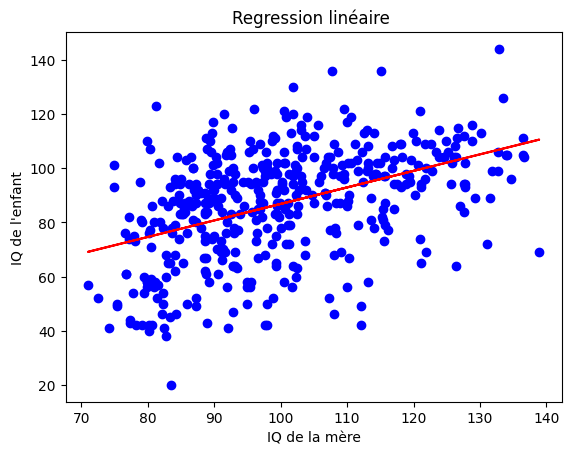

In [80]:
# Nuage des points et droite de régression
plt.plot(x, y, "bo", label="data")
plt.plot(x, beta1* x + beta0, "r-", label="regression")
plt.xlabel("IQ de la mère")
plt.ylabel("IQ de l'enfant")
plt.title("Regression linéaire ")

 Estimation de la loi de $\beta_1$ par Boostrap

In [81]:
np.random.seed(2)
# fonction du Bootsrap par paires
def bootstrap_pair(X, Y, N, indice):
    ech_beta = []
    data = pd.DataFrame({'X': X, 'Y': Y})

    for i in range(N):
        ech_boots = data.sample(n=len(data), replace=True)
        X_boot = ech_boots["X"]
        Y_boot = ech_boots["Y"]
        X_boot = sm.add_constant(X_boot)
        model_lr = sm.OLS(Y_boot, X_boot).fit()
        ech_beta.append(model_lr.params[indice])

    return ech_beta


X= np.array(kidiq["mom_iq"])
Y= np.array(kidiq["kid_score"])
moy_beta_1 = np.mean(bootstrap_pair(X,Y,1000,1))
print(moy_beta_1)
np.std(bootstrap_pair(X,Y,1000,1))

0.608274974156682


0.05543043259879359


#### Intervalle de Confiance

##### IC théorique:

In [82]:
# IC théorique
lr_model = sm.OLS(y, sm.add_constant(x)).fit()
confidence_intervals = lr_model.conf_int()
print(f"L'intervalle de confiance de beta_1 est [{confidence_intervals[0][1],confidence_intervals[1][1]}] la longeur est de {confidence_intervals[1][1]-confidence_intervals[0][1]}")

#lr_model.summary()

L'intervalle de confiance de beta_1 est [(0.4949534238641568, 0.7249957195974162)] la longeur est de 0.23004229573325935


##### IC Bootstrap:

In [83]:
# IC bootstrap
def IC_bootstrap(List, alpha):
  List = np.sort(List)
  b_inf=np.percentile(List,alpha)
  b_sup= np.percentile(List, 100-alpha)
  IC=[b_inf,b_sup]
  return IC
ic_boots = IC_bootstrap(bootstrap_pair(X,Y,300,1),5)
print(f"L'intervalle de confiance Bootstrap de beta_1 est {IC_bootstrap(bootstrap_pair(X,Y,1000,1),5)} la longeur est de {ic_boots[1]-ic_boots[0]}")


L'intervalle de confiance Bootstrap de beta_1 est [0.5182778314477559, 0.7132794706264548] la longeur est de 0.18873640901322541


L'intervalle de confiance Bootstrap à l'air d'être plus précis que lintervalle de confiance théorique.

### Contre exemple avec un jeu de données simulé:

In [84]:
# Simulation du jeu de données
np.random.seed(3)
X = np.random.normal(loc=0, scale=10, size=(150, 140)) #   p variables indépendantes (150 lignes)
X = np.hstack((np.ones((X.shape[0], 1)), X))
epsilon = np.random.normal(0,1,150)
coef= np.random.rand(X.shape[1])

Y = np.dot(X, coef) #+ epsilon # Variable dépendante
X.shape
Y.shape

#data=pd.DataFrame(X)
#corr_mat = data.corr()
beta_1_exact = coef[1]
beta_1_exact

0.39017643532201995

In [85]:
# Régression
model= LinearRegression()
model.fit(X,Y)
beta_0 = model.intercept_
beta_1=model.coef_[1]
beta_1

0.3901764353220145

In [86]:
# Fonction bootstrap par paires pour la régression multiple
def bootstrap_pair_multiple(X, Y, N, indice):

    ech_beta = []
    Y=Y.reshape(len(X),1)
    data=np.hstack((X,Y))

    for i in range(N):
        # réechantillonage
        indice_ech = np.random.choice(data.shape[0],len(data),replace=True)
        echantillons = data[indice_ech]

        # extraction de la matrice X et du vecteur Y
        X_boot = echantillons[:,:-1]
        Y_boot =echantillons[:,-1]

        # régression linéaire
        X_boot = sm.add_constant(X_boot)
        model_lr = sm.OLS(Y_boot, X_boot).fit()
        ech_beta.append(model_lr.params[indice])

    return ech_beta

In [87]:
# simulations des échantillons bootstrap
ech_beta_0=bootstrap_pair_multiple(X,Y,1000,0)
np.mean(ech_beta_0)
ech_beta_1=bootstrap_pair_multiple(X,Y,1000,1)
np.mean(ech_beta_1)

0.44602380695125854

##### Intervalle de Confiance

##### IC bootstrap:

In [88]:
IC_bootstrap(ech_beta_1,45)

[0.4210905116642548, 0.4725328972266625]

In [89]:
# Vérification de l'IC bootstrap
nombre_ech = 100
n = 100
nbr3 = 0
for i in range(nombre_ech):
  ech_b1=[]
  Y=Y.reshape(len(X),1)
  data=np.hstack((X,Y))
  IC_b=[]
  for j in range(n):
        # réechantillonage
        indice_ech = np.random.choice(data.shape[0],len(data),replace=True)
        echantillons = data[indice_ech]

        # extraction de la matrice X et du vecteur Y
        X_boot = echantillons[:,:-1]
        Y_boot =echantillons[:,-1]

        # régression linéaire
        X_boot = sm.add_constant(X_boot)
        model_lr = sm.OLS(Y_boot, X_boot).fit()
        ech_b1.append(model_lr.params[1])

  IC_b=IC_bootstrap(ech_b1,45)

  if IC_b[0] < beta_1_exact < IC_b[1]:
    nbr3 = nbr3 + 1


print(f" le paramètre tombe dans l'IC_boots dans {100*nbr3/nombre_ech} % des cas")

 le paramètre tombe dans l'IC_boots dans 12.0 % des cas


Plus on augmente le nombre de covariables moins est la précision de la méthode (Intervalle de confiance Bootstrap).

IC théorique

In [90]:
# IC théorique

lr_model = sm.OLS(Y, sm.add_constant(X)).fit()
confidence_intervals = lr_model.conf_int()
print(f"L'intervalle de confiance de beta_1 est {confidence_intervals[1]}")
print(f" l'Amplitude est de {confidence_intervals[1][1]-confidence_intervals[1][0]}")

L'intervalle de confiance de beta_1 est [0.39017644 0.39017644]
 l'Amplitude est de 1.0702549957386509e-13


# Partie 3 :

## Bootsrap paramétrique

Le bootstrap paramétrique est une méthode où les échantillons bootstrap ne sont pas obtenus par tirage à partir des données originales, mais simulés à partir du modèle paramétrique ajusté aux données. . Elle s’applique lorsqu’on peut supposer que les données proviennent d’une distribution précise, mais qu’on ne connait pas la distribution de la statistique qui nous intéresse.

l'application du principe de boostrap parametrique sur la regression en utilsante la loi normal

In [ ]:
# Importation de la table
kidiq = pd.read_csv("kidiq.csv")
kidiq.head()


,kid_score,mom_hs,mom_iq,mom_work,mom_age
0,65,1,121.117529,4,27
1,98,1,89.361882,4,25
2,85,1,115.443165,4,27
3,83,1,99.449639,3,25
4,115,1,92.745710,4,27


In [ ]:
X = kidiq['mom_age']
Y = kidiq['kid_score']
W =[]

X0= sm.add_constant(X)
model1 = sm.OLS(Y, X0).fit()
W.append(model1.params)
W

[const      70.956921
 mom_age     0.695186
 dtype: float64]

In [ ]:
X0= sm.add_constant(X)
model1 = sm.OLS(Y, X0).fit()
W.append(model1.params)
W

# calculuer les intervales de confiance des parametres
I_confiance= model1.conf_int()
I_confiance



,0,1
const,54.630660,87.283182
mom_age,-0.016356,1.406729


Calcul des résidus : Nous calculons les résidus du modèle, qui sont les différences entre les valeurs observées de la variable dépendante et les valeurs prédites par le modèle pour ces mêmes observations puis  nous traçons un histogramme des résidus pour visualiser leur distribution. Une distribution approximativement normale des résidus est une hypothèse importante de nombreux modèles de régression linéaire.

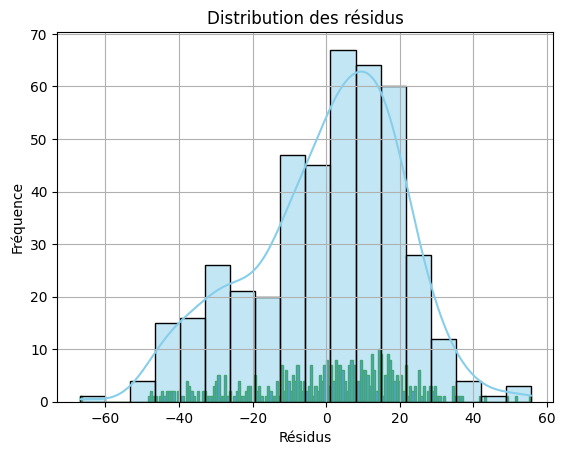

In [ ]:
# calculent les résidus du modèle en soustrayant les
#valeurs observées de la variable cible aux valeurs prédites par le modèle.
resid = model1.resid
residus = np.array(resid)
plt.hist(residus, bins=200, edgecolor='green')
# Affichage de l'histogramme des résidus
sns.histplot(residus, kde=True, color='skyblue')
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

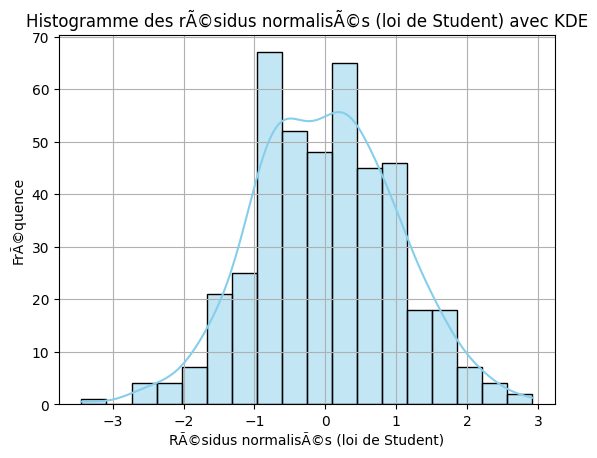

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
import numpy as np
from scipy.stats import t
import scipy.stats as stats

n = len(residus)
residuals = stats.t.rvs(df=n-1, size=n)

# Normalisation des rÃ©sidus
residus_n = (residuals - np.mean(residuals)) / np.std(residuals)

# TracÃ© de l'histogramme avec la KDE
sns.histplot(residus_n, kde=True, color='skyblue', edgecolor='black')
plt.xlabel('RÃ©sidus normalisÃ©s (loi de Student)')
plt.ylabel('FrÃ©quence')
plt.title('Histogramme des rÃ©sidus normalisÃ©s (loi de Student) avec KDE')
plt.grid(True)
plt.show()

methode de moussa :

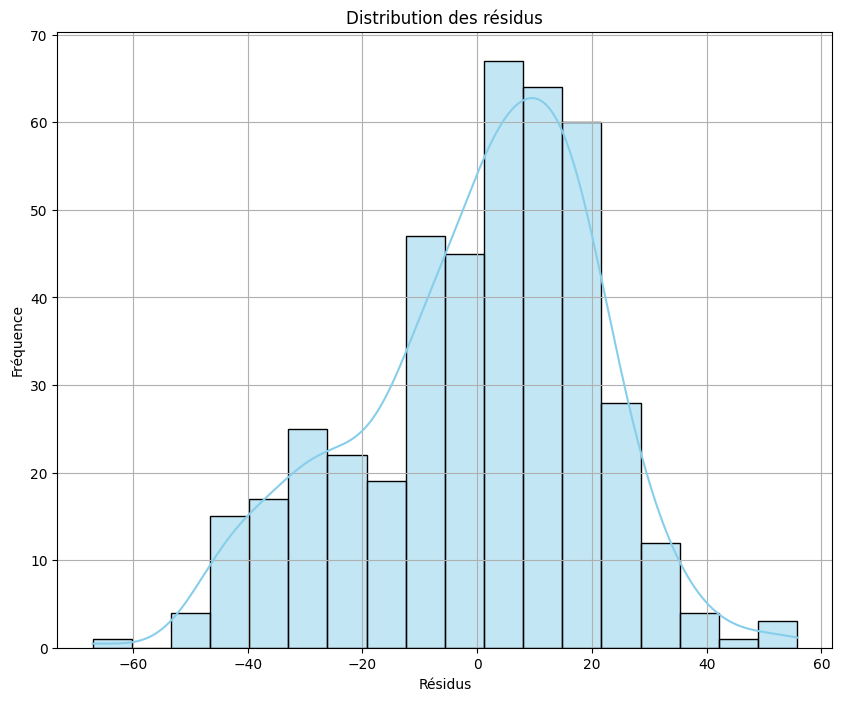

In [ ]:
#normalisation des résidus en appliquant la formule de la première partie
Y_predic = model1.predict(X0)
n=len(residus)
h=(1/n + (X-np.mean(X))**2/sum((X-np.mean(X))**2))
residus_s=1/(np.sqrt(1-h))*(Y-Y_predic)
residus_n=residus_s-np.mean(residus_s)

# Affichage de l'histogramme des résidus
plt.figure(figsize=(10, 8))
sns.histplot(residus_n, kde=True, color='skyblue')
plt.title('Distribution des résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [ ]:
# Estimation des paramètres de la distribution normale des résidus
moyenne_residus = np.mean(residus_n)
ecart_type_residus = np.std(residus_n)
print(moyenne_residus)
print(ecart_type_residus)
# maintenant on vas appliquer le  Bootstrap paramétrique   on supposons que la loi de Y sanacht X  est normal
nb_bootstrap = 1000
bootstrap_params0 = []
bootstrap_params1 = []


for _ in range(nb_bootstrap):
    # Génération d'échantillons bootstrap de résidus
    bootstrap_residus = np.random.normal(moyenne_residus ,ecart_type_residus, len(residus_n))

    # Réajustement du modèle avec les résidus bootstrap
    y_bootstrap = model1.fittedvalues + bootstrap_residus
    modele_bootstrap = sm.OLS(y_bootstrap, X0).fit()
    #model1.fittedvalues represente les valeurs predites de B
    # Stockage des paramètres estimés
    bootstrap_params0.append(modele_bootstrap.params[0])
    bootstrap_params1.append(modele_bootstrap.params[1])

print(bootstrap_params0)
print(bootstrap_params1)

0.0
20.34773603884035
[66.02857518846741, 51.565388990256174, 65.46014859425497, 55.13444726557831, 61.99455157936965, 81.31963413580824, 63.872221098677926, 74.31059793743476, 65.37085240311814, 66.80033185763344, 55.67335878927915, 81.24766289651319, 61.25134009147327, 50.99945256905883, 78.85434855159438, 80.91746267329535, 85.0141871125383, 84.47795760928345, 65.7376791068753, 58.03423898848226, 74.60900029355622, 81.16631219225955, 67.71915134737183, 77.95766250670646, 62.47710641483141, 70.73106277407554, 78.40124708529899, 54.88900431886127, 86.54117788539872, 60.483457355017286, 74.59441284427675, 73.73601844522905, 54.073093806810675, 76.18502152703888, 70.33277675036973, 82.18096471367868, 77.42636874290775, 76.98817894183486, 69.25680704174438, 79.02706759055312, 73.720854604412, 65.45508186970025, 71.51874560546445, 70.46315331415781, 68.09836402507467, 68.78343776229707, 82.19071286121532, 62.6220978893417, 62.00093260726629, 59.06901688515189, 69.31820758862285, 64.348325


Ces lignes effectuent le bootstrap paramétrique en rééchantillonnant les résidus du modèle initial à partir d'une distribution normale centrée sur la moyenne des résidus et ayant pour écart type l'écart type des résidus. Un nouveau modèle de régression linéaire est ajusté à chaque échantillon bootstrap, et les paramètres estimés de chaque modèle sont stockés dans les listes bootstrap_params0 et bootstrap_params1.


In [ ]:
# maintenant on vas appliquer le  Bootstrap paramétrique   on supposons que la loi de Y sanacht X  est normal
nb_bootstrap = 1000
bootstrap_params0 = []
bootstrap_params1 = []


for _ in range(nb_bootstrap):
    # Génération d'échantillons bootstrap de résidus
    bootstrap_residus = np.random.normal(moyenne_residus ,ecart_type_residus, len(residus_n))

    # Réajustement du modèle avec les résidus bootstrap
    y_bootstrap = model1.fittedvalues + bootstrap_residus
    modele_bootstrap = sm.OLS(y_bootstrap, X0).fit()
    #model1.fittedvalues represente les valeurs predites de B
    # Stockage des paramètres estimés
    bootstrap_params0.append(modele_bootstrap.params[0])
    bootstrap_params1.append(modele_bootstrap.params[1])

print(bootstrap_params0)
print(bootstrap_params1)

[69.66773569326779, 74.32755391527589, 79.43850715087265, 74.10395174545316, 63.11452352069781, 84.04630264829879, 81.25730499976072, 83.36509023646023, 61.10082628648741, 71.4919980672069, 64.12160544813031, 76.30335438382366, 66.30126551877281, 83.08747700041754, 69.73270450017651, 67.12070923277089, 72.12625939072522, 64.77083979106195, 62.45842346435582, 71.25942712009162, 78.8531189778346, 65.04655113897641, 75.76366611564364, 75.69117051731926, 72.04871497222224, 75.32495062221433, 65.31148726076731, 77.91302614957222, 79.464546375021, 75.4091623319858, 72.74154238034467, 66.99384125406577, 63.69008321091575, 58.60289932692077, 58.837479540480665, 80.21408653225856, 53.9277554489112, 72.55863775448424, 68.92663597212142, 74.5867998178933, 58.003169401091654, 80.65465944212193, 77.19820374327176, 81.4371942463185, 73.89753470944609, 62.32065636212465, 82.6704716509412, 72.09399206150175, 59.98767259673023, 76.82649803073853, 69.05777663599812, 69.39076442762894, 73.43765552185253,

In [ ]:
#Ces lignes calculent les bornes inférieures et supérieures des intervalles de confiance
# à 95% pour les paramètres de la régression à partir des échantillons bootstrap.
inf1=np.percentile(bootstrap_params1,2.5)
sup1=np.percentile(bootstrap_params1,97.5)
print(f" borne inf1 = {inf1}")
print(f" borne sup1 = {sup1}")
inf0=np.percentile(bootstrap_params0,2.5)
sup0=np.percentile(bootstrap_params0,97.5)

print(f" borne inf = {inf0}")
print(f" borne sup = {sup0}")


 borne inf1 = -0.03925042275113643
 borne sup1 = 1.3767403017705335
 borne inf = 55.517434810908696
 borne sup = 87.54129189859135


In [ ]:
#intervalle de confiance de la régression avec les données originales
confidence_intervals = model1.conf_int()
confidence_intervals

,0,1
const,54.630660,87.283182
mom_age,-0.016356,1.406729


Conclusion
En comparant avec les intervalles  de confiance obtenu avant le bootstrap, l'estimation de β0  et  β1  est meilleure, et nos intervalles de confiance sont  considérablement réduits en taille.

